# Visualization of the AISFMs

This example shows how to plot a [SunPy Map](https://docs.sunpy.org/en/stable/api/sunpy.map.Map.html?highlight=Map#map) of our AI-generated Solar Farside Magnetograms (AISFMs).

Here we use [Matplotlib](https://matplotlib.org), [Astropy](https://www.astropy.org/), and [SunPy](https://sunpy.org/) modules.

In [1]:
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u

import sunpy.map 

We start with a sample data obtained from the [KDC for SDO](http://sdo.kasi.re.kr/) website.

In [2]:
map_aisfm = sunpy.map.Map("./Sample_AISFMs/aisfm_v3_stereo_b_20110305_120403.fits") 

We can inspect the Map like this:

Observatory,
Instrument,
Detector,
Measurement,Unknown
Wavelength,Unknown
Observation Date,2011-03-05 12:04:03
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.09736489 2.09736489] arcsec / pix
Reference Pixel,[510. 510.] pix

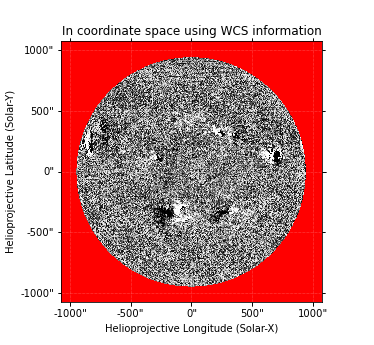
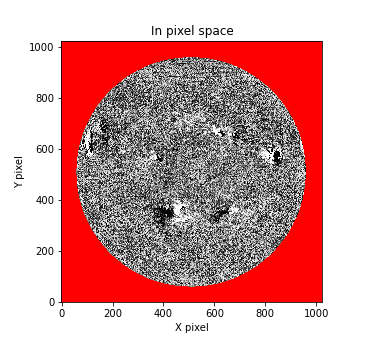
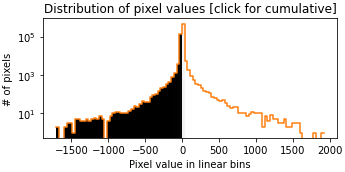
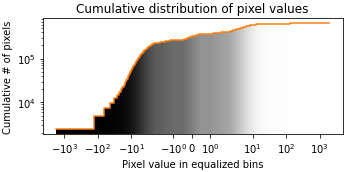

In [3]:
map_aisfm


We can plot the Map quickly and easily using the SunPy's [peek()](https://docs.sunpy.org/en/stable/api/sunpy.map.GenericMap.html#sunpy.map.GenericMap.peek) fuction.
The data inside the solar radius represent magnetic fields (in Gauss) at the solar surface and the outside are filled with NaN values.

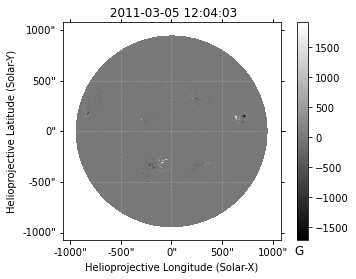

In [4]:
map_aisfm.peek()

We can show the magnetic fields saturated at +/- 100 Gauss.

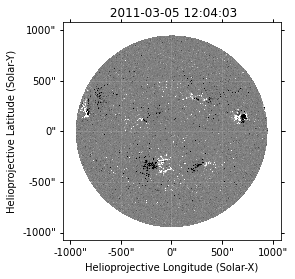

In [5]:
fig = plt.figure()

map_aisfm.plot(vmax=100, vmin=-100)

plt.show()

When you want to display magnetic fields with a large dynamic range, you can apply other color maps and normalizations like this:

In [6]:
map_aisfm.plot_settings['cmap'] = "hmimag"
map_aisfm.plot_settings['norm'] = plt.Normalize(-1500, 1500)

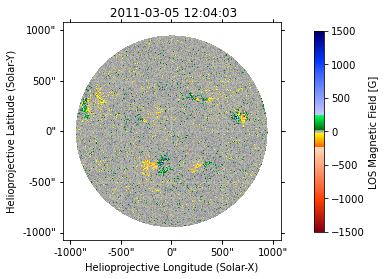

In [7]:
fig = plt.figure()

im = map_aisfm.plot()

cb = plt.colorbar(im, fraction=0.03, pad=0.1)
cb.set_label(f"LOS Magnetic Field [{map_aisfm.unit}]")

plt.show()

We also can plot a cutout region of the Map.

In [8]:
xlims_world = [470, 870]*u.arcsec
ylims_world = [-50, 350]*u.arcsec

world_coords = SkyCoord(Tx=xlims_world, Ty=ylims_world, frame=map_aisfm.coordinate_frame)
pixel_coords = map_aisfm.world_to_pixel(world_coords)

xlims_pixel = pixel_coords.x.value
ylims_pixel = pixel_coords.y.value

Plots of full disk and cropped magnetograms side by side:

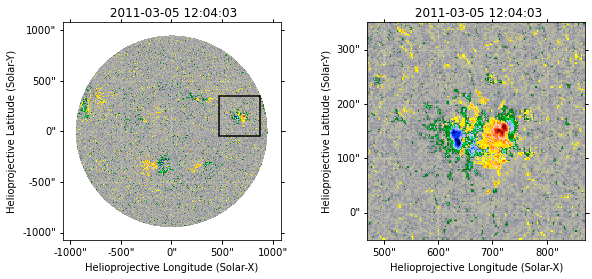

In [9]:
fig = plt.figure(figsize=(10, 4))

#------------------------------------------------------------------
ax1 = plt.subplot(121, projection=map_aisfm)
map_aisfm.plot(axes=ax1)
map_aisfm.draw_quadrangle(world_coords, edgecolor='black', lw=1.5)

#------------------------------------------------------------------
ax2 = plt.subplot(122, projection=map_aisfm)
map_aisfm.plot(axes=ax2)

ax2.set_xlim(xlims_pixel)
ax2.set_ylim(ylims_pixel)

#------------------------------------------------------------------
plt.show()


You can try more examples by following the [SunPy Example Gallery](https://docs.sunpy.org/en/stable/generated/gallery/index.html).